# 0. Install and Import Dependencies

In [1]:
!pip3 list

Package                 Version
----------------------- -----------
absl-py                 2.1.0
appnope                 0.1.4
asttokens               2.4.1
astunparse              1.6.3
beautifulsoup4          4.12.3
certifi                 2024.6.2
charset-normalizer      3.3.2
comm                    0.2.2
contourpy               1.2.1
cycler                  0.12.1
debugpy                 1.8.1
decorator               5.1.1
executing               2.0.1
filelock                3.15.3
flatbuffers             24.3.25
fonttools               4.53.0
gast                    0.5.4
gdown                   5.2.0
google-pasta            0.2.0
grpcio                  1.64.1
h5py                    3.11.0
idna                    3.7
imageio                 2.34.1
ipykernel               6.29.4
ipython                 8.25.0
jedi                    0.19.1
jupyter_client          8.6.2
jupyter_core            5.7.2
keras                   3.3.3
kiwisolver              1.4.5
libclang           

In [2]:
!pip3 install opencv-python matplotlib imageio gdown tensorflow

In [2]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 1. Build Data Loading Functions

In [6]:
import gdown

In [19]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=54f6d0f0-0825-45b2-922d-a48e87467e61
To: /Users/lihaidun/NSCC/CodeSpace/LipNet/data.zip
100%|██████████| 423M/423M [00:37<00:00, 11.2MB/s] 


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [6]:
def load_video(path:str) -> List[float]:

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()

    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [7]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [8]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [9]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [10]:
char_to_num(['n','i','c','k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11])>

In [11]:
num_to_char([14,  9,  3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [12]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [13]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    #file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments

In [14]:
import os

pwd = os.getcwd()

# test_path = os.path.join(pwd,'data','s1','bbal6n.mpg')

test_path = '.\\data\\s1\\bbal6n.mpg'

In [15]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [16]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

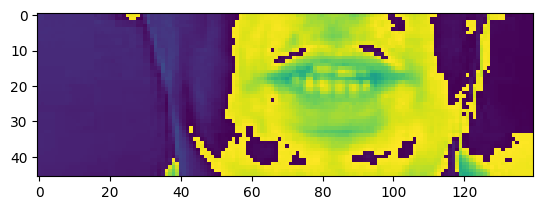

In [17]:
plt.imshow(frames[40])

In [18]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [19]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [20]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2. Create Data Pipeline

In [21]:
from matplotlib import pyplot as plt

In [22]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split
train = data.take(450)
test = data.skip(450)

In [23]:
len(test)

50

In [24]:
frames, alignments = data.as_numpy_iterator().next()

OpenCV: Couldn't read video stream from file "data/s1/.mpg"
2024-06-21 14:54:32.104702: W tensorflow/core/framework/op_kernel.cc:1827] UNKNOWN: FileNotFoundError: [Errno 2] No such file or directory: 'data/alignments/s1/.align'
Traceback (most recent call last):

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)
              ^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)
          ^^^^^^^^^^^^^^^^^

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/autogr

UnknownError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} FileNotFoundError: [Errno 2] No such file or directory: 'data/alignments/s1/.align'
Traceback (most recent call last):

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)
              ^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)
          ^^^^^^^^^^^^^^^^^

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/var/folders/5y/8wf3zbrx6k91qcb2jgf69fl40000gn/T/ipykernel_16494/1624089498.py", line 9, in load_data
    alignments = load_alignments(alignment_path)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/var/folders/5y/8wf3zbrx6k91qcb2jgf69fl40000gn/T/ipykernel_16494/1342149016.py", line 2, in load_alignments
    with open(path, 'r') as f:
         ^^^^^^^^^^^^^^^

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 324, in _modified_open
    return io_open(file, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

FileNotFoundError: [Errno 2] No such file or directory: 'data/alignments/s1/.align'


	 [[{{node EagerPyFunc}}]] [Op:IteratorGetNext] name: 

In [ ]:
len(frames)

75

In [ ]:
sample = data.as_numpy_iterator()

In [ ]:
val = sample.next(); val[0]

OpenCV: Couldn't read video stream from file "data/s1/.mpg"
2024-06-21 14:03:24.295650: W tensorflow/core/framework/op_kernel.cc:1827] UNKNOWN: FileNotFoundError: [Errno 2] No such file or directory: 'data/alignments/s1/.align'
Traceback (most recent call last):

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)
              ^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)
          ^^^^^^^^^^^^^^^^^

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/autogr

UnknownError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} FileNotFoundError: [Errno 2] No such file or directory: 'data/alignments/s1/.align'
Traceback (most recent call last):

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)
              ^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)
          ^^^^^^^^^^^^^^^^^

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/var/folders/5y/8wf3zbrx6k91qcb2jgf69fl40000gn/T/ipykernel_80855/1624089498.py", line 9, in load_data
    alignments = load_alignments(alignment_path)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/var/folders/5y/8wf3zbrx6k91qcb2jgf69fl40000gn/T/ipykernel_80855/1342149016.py", line 2, in load_alignments
    with open(path, 'r') as f:
         ^^^^^^^^^^^^^^^

  File "/Users/lihaidun/NSCC/CodeSpace/LipNet/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 324, in _modified_open
    return io_open(file, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

FileNotFoundError: [Errno 2] No such file or directory: 'data/alignments/s1/.align'


	 [[{{node EagerPyFunc}}]] [Op:IteratorGetNext] name: 

In [ ]:
imageio.mimsave('./animation.gif', val[0][0], fps=10)

NameError: name 'val' is not defined

In [ ]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video
plt.imshow(val[0][0][35])

: 

In [ ]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

: 

# 3. Design the Deep Neural Network

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

: 

In [ ]:
data.as_numpy_iterator().next()[0][0].shape

: 

In [ ]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

initializer = keras.initializers.Orthogonal()
model.add(Bidirectional(LSTM(128, kernel_initializer=initializer, return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer=initializer, return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

: 

In [ ]:
model.summary()

: 

In [ ]:
5*17*75

: 

In [ ]:
yhat = model.predict(val[0])

: 

In [ ]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

: 

In [ ]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

: 

In [ ]:
model.input_shape

: 

In [ ]:
model.output_shape

: 

# 4. Setup Training Options and Train

In [ ]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

: 

In [ ]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

: 

In [ ]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

: 

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

: 

In [ ]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True)

: 

In [ ]:
schedule_callback = LearningRateScheduler(scheduler)

: 

In [ ]:
example_callback = ProduceExample(test)

: 

In [ ]:
model.fit(train, validation_data=test, epochs=100, callbacks=[checkpoint_callback, schedule_callback, example_callback])

: 

# 5. Make a Prediction 

In [ ]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

: 

In [ ]:
model.load_weights('models/checkpoint')

: 

In [ ]:
test_data = test.as_numpy_iterator()

: 

In [ ]:
sample = test_data.next()

: 

In [ ]:
yhat = model.predict(sample[0])

: 

In [ ]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

: 

In [ ]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

: 

In [ ]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

: 

# Test on a Video

In [ ]:
sample = load_data(tf.convert_to_tensor('.\\data\\s1\\bras9a.mpg'))

: 

In [ ]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

: 

In [ ]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

: 

In [ ]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

: 

In [ ]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

: 

: 

: 